# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

# Load Data

In [2]:
df_products = pd.read_csv('C:/github/EECS731/the-oscars/Data/Historical Product Demand.csv')
df_products = df_products.dropna()
for i in df_products.index:
    val = df_products.at[i,'Order_Demand'].strip()
    if not val.isdigit():
        val = val[1:-1]
    df_products.at[i,'Order_Demand'] = int(val)
df_products

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


# Transform Data

### Warehouse Order Demand

In [3]:
df_warehouse_demand = df_products.drop(columns=['Product_Category','Product_Code'])
year_month = []
for date in df_warehouse_demand['Date']:
    y,m,d = date.split('/')
    year_month.append(y+'-'+str(m).zfill(2))
df_warehouse_demand['Year-Month'] = year_month
df_warehouse_demand = df_warehouse_demand.drop(columns=['Date'])
df_warehouse_demand = df_warehouse_demand.groupby(['Year-Month','Warehouse'],as_index=False).sum()
df_warehouse_demand = df_warehouse_demand.iloc[20:-10]
df_warehouse_demand

,Year-Month,Warehouse,Order_Demand
20,2012-02,Whse_J,57113723
21,2012-02,Whse_S,16319022
22,2012-03,Whse_A,2362428
23,2012-03,Whse_C,11296947
24,2012-03,Whse_J,54925680
...,...,...,...
242,2016-10,Whse_A,1985331
243,2016-10,Whse_C,11177205
244,2016-10,Whse_J,56925432
245,2016-10,Whse_S,13912789


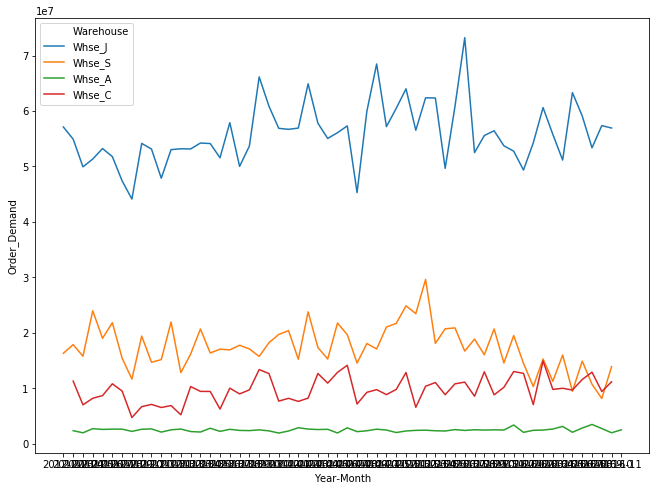

In [4]:
fig, ax = pyplot.subplots(figsize=(11,8))
ax = sns.lineplot(x='Year-Month',y='Order_Demand',hue='Warehouse',data=df_warehouse_demand,ax=ax)

Warehouse J sees by far the most orders at about 6 million per month while warehouse A averages less than 500 thousand. This tells us one of two things; either warehouse J is significantly bigger than warehouse A, or Warehouse J gets a lot more small products while Warehouse A is used for bigger inventory.

### Product Category Demand

In [5]:
df_category_frequency = df_products.drop(columns=['Warehouse','Product_Code','Date'])
for i in df_category_frequency.index:
#     val = df_category_frequency.at[i,'Order_Demand'].strip()
    name = str(df_category_frequency.at[i,'Product_Category']).split('_')
#     if not val.isdigit():
#         val = val[1:-1]
#     df_category_frequency.at[i,'Order_Demand'] = int(val)
    df_category_frequency.at[i,'Product_Category'] = int(name[1])
df_category_frequency = df_category_frequency.groupby(['Product_Category'],as_index=False).sum()
df_category_frequency = df_category_frequency.sort_values(by=['Order_Demand'],ascending=False)
df_category_frequency

,Product_Category,Order_Demand
18,19,4240159257
5,6,405571330
4,5,199674520
6,7,128691531
27,28,49055354
32,33,42610000
29,30,40966555
20,21,4480570
31,32,4473048
8,9,3782141


In [6]:
df_product_frequency = df_products.drop(columns=['Warehouse','Date'])

In [7]:
df_product_frequency = df_product_frequency[df_product_frequency.Product_Category == 'Product_019']

In [8]:
df_product_frequency = df_products.drop(columns=['Warehouse','Date'])
df_product_frequency = df_product_frequency[df_product_frequency.Product_Category == "Category_019"]
df_product_frequency = df_product_frequency.drop(columns=['Product_Category'])
for i in df_product_frequency.index:
#     val = df_product_frequency.at[i,'Order_Demand'].strip()
    name = str(df_product_frequency.at[i,'Product_Code']).split('_')
#     if not val.isdigit():
#         val = val[1:-1]
#     df_product_frequency.at[i,'Order_Demand'] = int(val)
    df_product_frequency.at[i,'Product_Code'] = int(name[1])
df_product_frequency = df_product_frequency.groupby(['Product_Code'],as_index=False).sum()
df_product_frequency = df_product_frequency.sort_values(by=['Order_Demand'],ascending=False)
df_product_frequency

,Product_Code,Order_Demand
263,1359,472474000
153,1248,289117000
29,83,210651000
245,1341,169777000
199,1295,123303000
...,...,...
481,1615,151
93,865,108
92,864,93
533,2151,68


In [9]:
top4 = list(df_category_frequency['Order_Demand'].iloc[:4])
total = sum(df_category_frequency['Order_Demand'])
rest = 100*sum(list(df_category_frequency['Order_Demand'].iloc[5:]))/total
labels = list(map(lambda x: "Category "+ str(x),list(df_category_frequency['Product_Category'].iloc[:4])))
labels.append('Others')
values = list(map(lambda x: 100*x/total,top4))
values.append(rest)
total_19 = sum(df_product_frequency['Order_Demand'])
val_19 = list(df_product_frequency['Order_Demand'].iloc[:8])
values_19 = list(map(lambda x: values[0]*x/total,val_19))
rest_19 = values[0]-sum(values_19)
values_19.append(rest_19)
values_19.append(100-sum(values_19))
labels_19 = list(map(lambda x: "Product "+ str(x),list(df_product_frequency['Product_Code'].iloc[:8])))
labels_19.append('Other Category 19')
labels_19.append('')

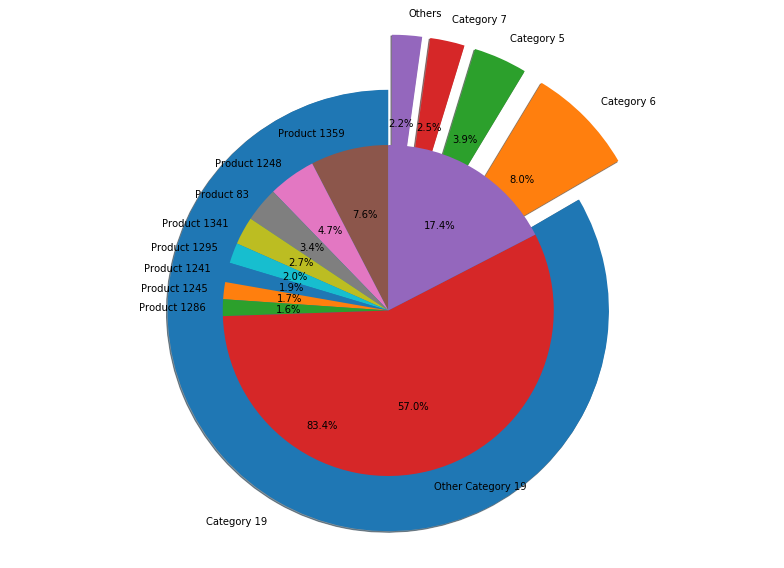

In [16]:
fig2,ax2 = pyplot.subplots(figsize=(11,8))
pyplot.pie(values, explode=[0,1,1,1,1], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,frame=True,radius=4.0)
pyplot.pie(values_19,labels=labels_19, autopct='%1.1f%%', shadow=True, startangle=90,radius=3.0)
pyplot.axis('equal')
pyplot.tight_layout()
pyplot.show()

Product Category 19 is by far the most demanded product category consisting of 83.4% of the orders. Among category 19 products, Product 1359 is the most ordered with 7.6% of all product orders. The top 4 categories, 19, 6, 5, and 7 account for 97.8% of all products ordered to the warehouse.

### Product Demand by Month

In [11]:
df_monthly_demand = df_products.copy()
df_monthly_demand = df_monthly_demand[df_monthly_demand.Product_Code == 'Product_1341']
month = []
for date in df_monthly_demand['Date']:
    y,m,d = date.split('/')
    month.append(str(m).zfill(2))
df_monthly_demand['Month'] = month
df_monthly_demand = df_monthly_demand.drop(columns=['Date','Product_Code','Product_Category','Warehouse'])
# for i in df_monthly_demand.index:
#     val = df_monthly_demand.at[i,'Order_Demand'].strip()
#     if not val.isdigit():
#         val = val[1:-1]
#     df_monthly_demand.at[i,'Order_Demand'] = int(val)
df_monthly_demand = df_monthly_demand.groupby(['Month'],as_index=False).sum()
df_monthly_demand = df_monthly_demand.sort_values(by=['Month'])
df_monthly_demand

,Month,Order_Demand
0,01,12421000
1,02,18029000
2,03,16535000
3,04,14454000
4,05,14338000
5,06,12612000
6,07,17249000
7,08,12448000
8,09,10268000
9,10,12469000


In [12]:
month_list = list(map(lambda x: x/1000000,list(df_monthly_demand['Order_Demand'])))

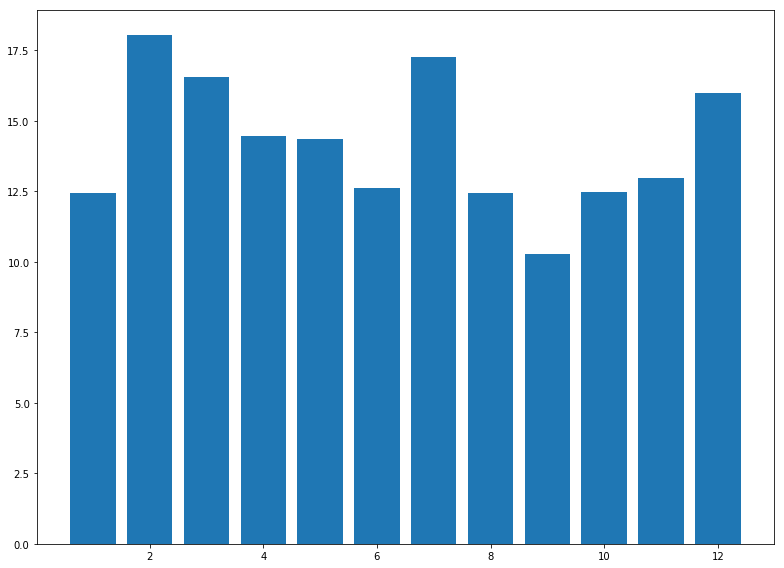

In [13]:
fig3,ax3 = pyplot.subplots(figsize=(11,8))
ax3.bar(x=[1,2,3,4,5,6,7,8,9,10,11,12],height=month_list)
pyplot.title="Purchases per Month"
pyplot.ylabel="Purchaes (in millions)"
pyplot.xlabel="Month"
pyplot.tight_layout()
pyplot.show()

This is just product 1341's warehouse demand. As you can see it is highest in February and is lowest in September.